In [116]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
#data1 = '../Datasets/kidney_disease.csv'
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [30]:
data.shape

(400, 26)

In [31]:
#renaming the columns
data.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [78]:
data.describe()


,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,class
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,0.0
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,NaN
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [85]:
# lets do separation of categorical and numerical variables.

cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object' ]


In [81]:
for cat in cat_cols:
    print(f"{cat} has {data[cat].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

packed_cell_volume has [44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.] values

white_blood_cell_count has [ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  410

There are problems with columns. Diabetes_mellitus, Coronary artery disease and Class, have more than Two options. 

# 1. lets work on this first. 

In [73]:
data['diabetes_mellitus'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
data['coronary_artery_disease'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
data['class'] = data['class'].replace({'\tnotckd':'notckd','ckd\t':'ckd',' ckd':'ckd'},inplace=True)
data['class'] = data['class'].map({'ckd': 0, 'not ckd': 1})
data['class'] = pd.to_numeric(data['class'], errors='coerce')

In [77]:
# Replace values in 'diabetes_mellitus' column
data['diabetes_mellitus'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'}, inplace=True)
# Replace values in 'coronary_artery_disease' column
data['coronary_artery_disease'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'}, inplace=True)
# Replace values in 'class' column and convert to numeric
data['class'].replace({'\tnotckd':'notckd','ckd\t':'ckd',' ckd':'ckd'}, inplace=True)
data['class'].replace({'ckd': 0, 'notckd': 1}, inplace=True)
data['class'] = pd.to_numeric(data['class'], errors='coerce')
data

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,NaN
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,NaN
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,NaN
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,NaN
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,NaN
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,NaN
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,NaN
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,NaN


In [75]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {data[col].unique()} values\n")


diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [nan] values



# another issue was columns which appear as categorical, while they should be numerical. 


In [80]:
# converting necessary columns to numerical type

data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')

## Distribution for numerical data

C:\Users\USER\AppData\Local\Temp\ipykernel_6348\3526016946.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\USER\AppData\Local\anaconda3\envs\Python1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_6348\3526016946.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wi

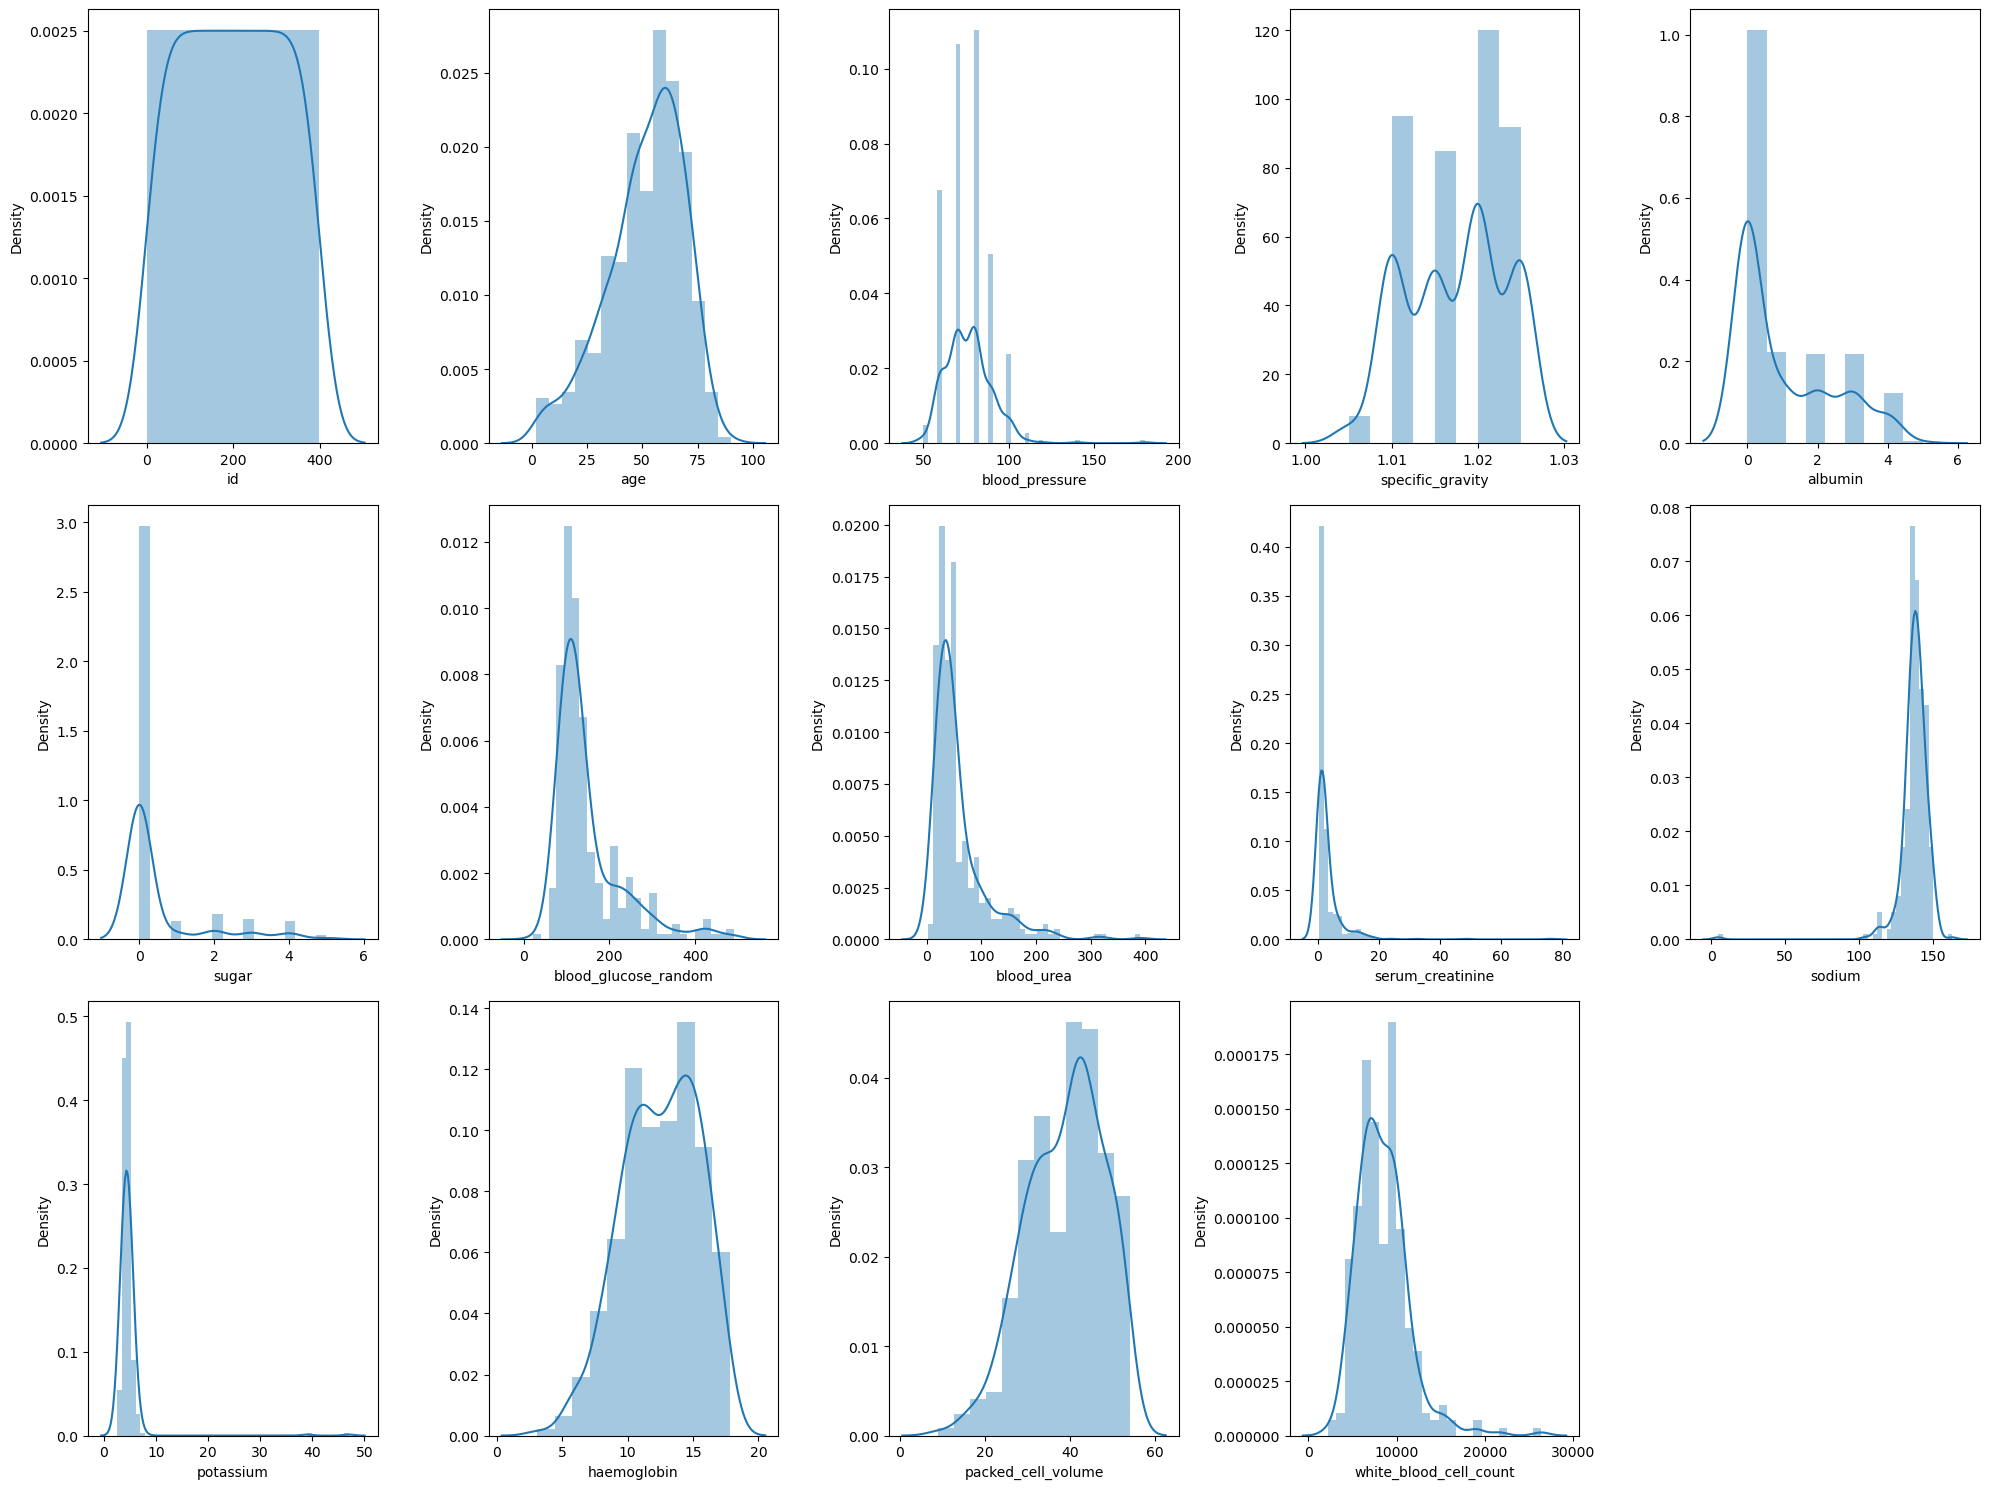

In [93]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'normal'

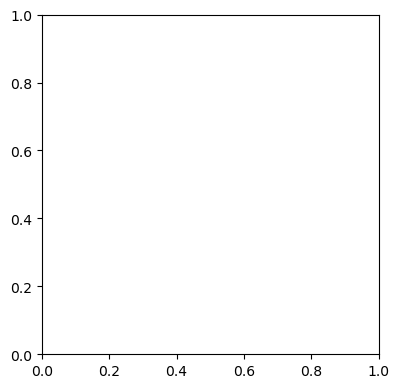

In [97]:

plt.figure(figsize = (20, 15))
plotnumber = 3

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# EXPLORATORY DATA ANALYSIS

In [118]:
# DEFINE FUCNTIONS i will use to create different plots
def violin(col):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x="class", y=col, data=data, hue="class", split=True)
    plt.xlabel("class")
    plt.ylabel(col)
    plt.title(f"Violin Plot of {col} by Class")
    plt.grid(True)
    plt.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(data, x=col1, y=col2, color="class", template='plotly_dark')
    if fig is not None:
        fig.show()
    else:
        print("Error: Plot could not be generated.")


In [121]:
    plt.figure(figsize=(10, 6))
#scatter('red_blood_cell_count', 'packed_cell_volume')
    plt.scatter(data['red_blood_cell_count'], df['packed_cell_volume'] ) #, c=data['class']
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.colorbar(label='class')
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.grid(True)
    plt.show()

TypeError: 'NoneType' object is not subscriptable

<Figure size 1000x600 with 0 Axes>

# Data preprocessing.


In [125]:
# count the number of Nulls.
data.isna().sum().sort_values()


AttributeError: 'NoneType' object has no attribute 'isna'

In [127]:
data.head()

AttributeError: 'NoneType' object has no attribute 'head'